<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Glaucoma_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Import Libraries **

In [0]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

%matplotlib inline

*Declare list variables to store the image and corresponding label*

In [0]:
dataset = []
label = []

In [0]:
import os
# Directory with our infected pictures
Glaucoma_dir = os.path.join('drive/My Drive/Deep Learning Project/Glaucoma')

# Directory with our uninfected pictures
Non_Glaucoma_dir = os.path.join('drive/My Drive/Deep Learning Project/Non Glaucoma')

*Converting Glaucoma images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 0 - for Glaucoma affected*

In [0]:
parasitized_images = os.listdir(Glaucoma_dir)
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(Glaucoma_dir+"/"+image_name)
            #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

*Shape of the data containing Glaucoma images*

In [12]:
dataset[0].shape

(64, 64, 3)

*Converting Non Glaucoma images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 0 - for not Glaucoma affected*

In [0]:
uninfected_images = os.listdir(Non_Glaucoma_dir)
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(Non_Glaucoma_dir + '/' + image_name)
            #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [19]:
dataset[-1].shape

(64, 64, 3)

*Randomly ploting 5 different Glaucoma images*

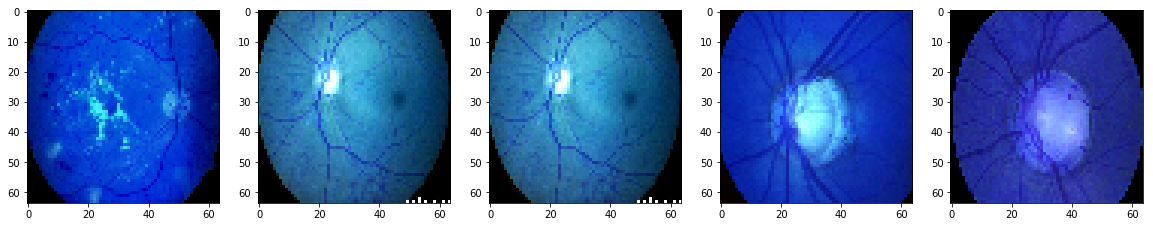

In [20]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

*Randomly ploting 5 different Non Glaucoma images *

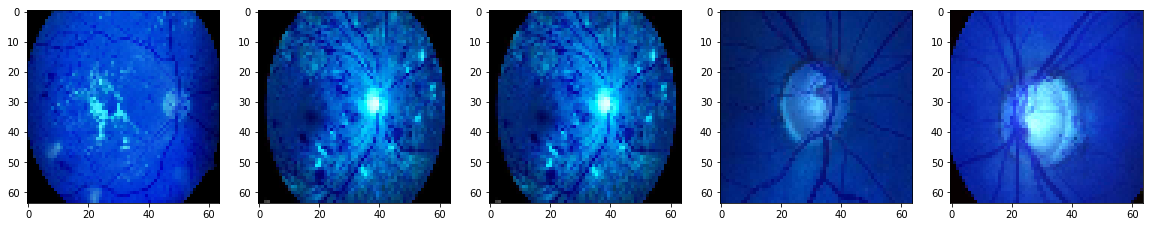

In [22]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(uninfected_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

*converting the list of images into an array -Predictor set *

In [23]:
X = np.array(dataset)
print(X.shape)

(40, 64, 64, 3)


In [74]:
#Y= np.array(label).reshape(-1,1)
Y= np.array(label)
Y.shape

(40,)

*Randomly ploting the images from input array = X*

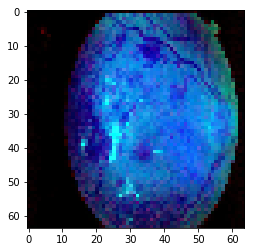

In [24]:
plt.imshow(X[-1])

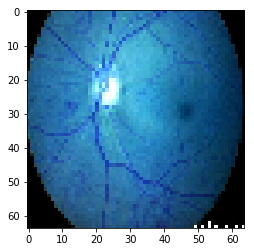

In [25]:
plt.imshow(X[0])

*Test Train Split*

In [0]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [45]:
print(X_train.shape)
print(X_test.shape)

(32, 64, 64, 3)
(8, 64, 64, 3)


In [46]:
print(y_train.shape)
print(y_test.shape)

(32, 1)
(8, 1)


In [47]:
X_train[0].shape[0]

64

In [48]:
X_train[0].shape[1]

64

In [0]:
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.python.framework import ops
ops.reset_default_graph()

*Start a graph session*

In [0]:
sess = tf.Session()

*Set Model Parameters*

In [77]:
batch_size = 10
learning_rate = 0.005
#learning_rate = 0.001
evaluation_size = 500
image_width = X_train[0].shape[0]
image_height = X_train[0].shape[1]
target_size = 1
print(image_width,image_height,target_size)
num_channels = 3 # COLOURED IMAGES
generations = 500
eval_every = 5
#
conv1_features = 25 #number of neurons in conv layer 1
conv2_features = 50  #number of neurons in conv layer 2
conv3_features = 75  #number of neurons in conv layer 3
#
max_pool_size1 = 2 # NxN window for 1st max pool layer
max_pool_size2 = 2 # NxN window for 2nd max pool layer
max_pool_size3 = 2 # NxN window for 3rd max pool layer
#
fully_connected_size1 = 100

64 64 1


*Declare model placeholders*

In [0]:
x_input_shape = (batch_size, image_width, image_height, num_channels)
#
x_input = tf.placeholder(tf.float32, shape=x_input_shape)
y_target = tf.placeholder(tf.int32, shape=(batch_size))
#
eval_input_shape = (evaluation_size, image_width, image_height, num_channels)
#
eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)
eval_target = tf.placeholder(tf.int32, shape=(evaluation_size))

*Declare Model Parameters*

In [0]:
conv1_weight = tf.Variable(tf.truncated_normal([4, 4, num_channels, conv1_features],stddev=0.1, dtype=tf.float32))
conv1_bias = tf.Variable(tf.zeros([conv1_features], dtype=tf.float32))

conv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, conv2_features],stddev=0.1, dtype=tf.float32))
conv2_bias = tf.Variable(tf.zeros([conv2_features], dtype=tf.float32))

conv3_weight = tf.Variable(tf.truncated_normal([4, 4, conv2_features, conv3_features],stddev=0.1, dtype=tf.float32))
conv3_bias = tf.Variable(tf.zeros([conv3_features], dtype=tf.float32))

*Declare fully connected variables*

In [0]:
resulting_width = image_width // (max_pool_size1 * max_pool_size2)
resulting_height = image_height // (max_pool_size1 * max_pool_size2)
#
full1_input_size = resulting_width * resulting_height * conv2_features
#
full1_weight = tf.Variable(tf.truncated_normal([full1_input_size, fully_connected_size1],stddev=0.1, dtype=tf.float32))
full1_bias = tf.Variable(tf.truncated_normal([fully_connected_size1], stddev=0.1, dtype=tf.float32))
#
full2_weight = tf.Variable(tf.truncated_normal([fully_connected_size1, target_size],stddev=0.1, dtype=tf.float32))
full2_bias = tf.Variable(tf.truncated_normal([target_size], stddev=0.1, dtype=tf.float32))


*Initialize Model Operations*

In [0]:
def my_conv_net(input_data):
    # First Conv-ReLU-MaxPool Layer
    conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1, max_pool_size1, 1],strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')

    # Second Conv-ReLU-MaxPool Layer
    conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1],strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')
    
    
    # Third Conv-ReLU-MaxPool Layer
    conv3 = tf.nn.conv2d(max_pool2, conv3_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu3 = tf.nn.relu(tf.nn.bias_add(conv3, conv3_bias))
    max_pool3 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size3, max_pool_size3, 1],strides=[1, max_pool_size3, max_pool_size3, 1], padding='SAME')

    # Transform Output into a 1xN layer for next fully connected layer
    final_conv_shape = max_pool3.get_shape().as_list()
    #             HEIGHT                 WIDTH                 CHANNEL
    final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
    flat_output = tf.reshape(max_pool2, [final_conv_shape[0], final_shape])

    # First Fully Connected Layer
    fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))

    # Second Fully Connected Layer
    final_model_output = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
    
    return(final_model_output)

*Instantiating the model*

In [0]:
model_output = my_conv_net(x_input)
test_model_output = my_conv_net(eval_input)

*Declare Loss Function*

In [0]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model_output,labels = y_target))

*Optimizer Function*

In [0]:
# Create an optimizer
my_optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
train_step = my_optimizer.minimize(loss)

*Create Prediction Function*

In [0]:
prediction = tf.nn.sigmoid(model_output)
test_prediction = tf.nn.sigmoid(test_model_output)

*Create Accuracy Function*

In [0]:
def get_accuracy(logits, targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_correct = np.sum(np.equal(batch_predictions, targets))
    return(100. * num_correct/batch_predictions.shape[0])

*Initialize variables*

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

*Train the model*

In [88]:
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(X_train), size=batch_size)
    rand_x = X_train[rand_index]
    #rand_x = np.expand_dims(rand_x, 3)
    rand_y = y_train[rand_index]
    train_dict = {x_input: rand_x, y_target: rand_y}
    
    sess.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict=train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(X_test), size=evaluation_size)
        eval_x = X_test[eval_index]
        #eval_x = np.expand_dims(eval_x, 3)
        eval_y = y_test[eval_index]
        test_dict = {eval_input: eval_x, eval_target: eval_y}
        test_preds = sess.run(test_prediction, feed_dict=test_dict)
        temp_test_acc = get_accuracy(test_preds, eval_y)
        
        # Record and print results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

Generation # 5. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 10. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 15. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 20. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 25. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 30. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 35. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 40. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 45. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 50. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 55. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 60. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 65. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (100.00)
Generation # 70. Train Loss: 0.00. Train Acc (Test A

*Plot loss over time*

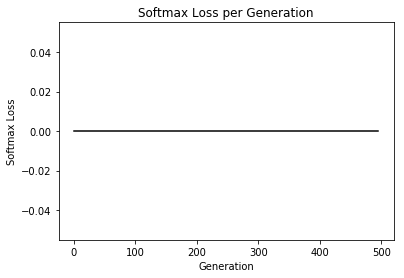

In [89]:
eval_indices = range(0, generations, eval_every)
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

*Plot train and test accuracy*

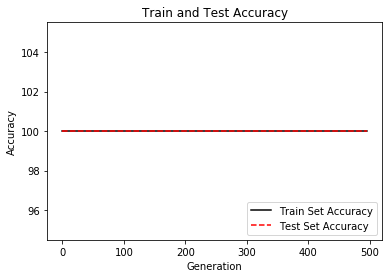

In [90]:
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

*Plot some samples*

In [104]:
y_test[rand_index]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

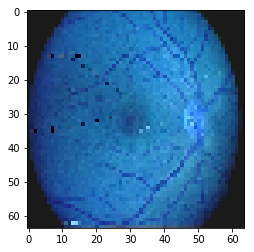

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


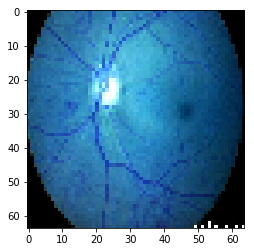

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


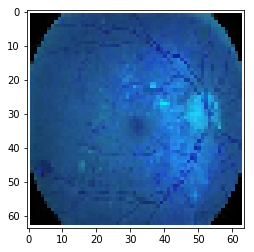

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


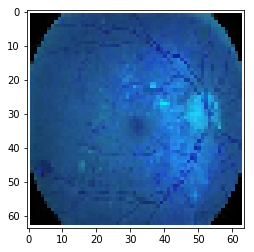

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


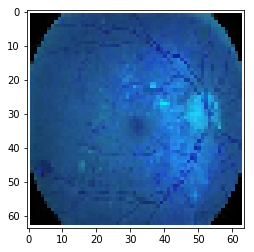

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


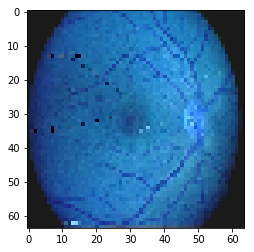

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


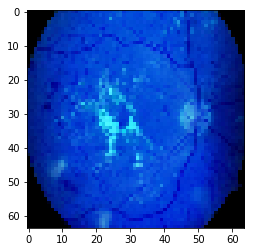

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


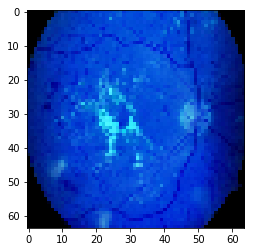

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


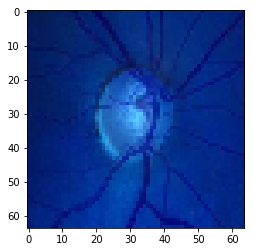

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


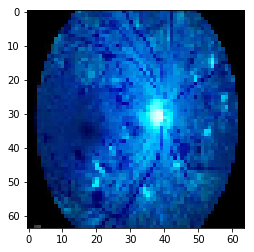

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [106]:
rand_index = np.random.choice(len(X_test), size=batch_size)
for i in rand_index:
  predictions = np.argmax(temp_train_preds,axis=1)[i]
  images = rand_x[i]
  actuals = y_test[i]
  print('='*80)
  plt.imshow(images)
  plt.show()
  if actuals ==0:
    msg ='The actual image is Glaucoma affected'
  else:
    msg = 'The actual image is not Glaucoma affected'
  print("+"*80)
  print(msg)
  if predictions == 0 :
    print('The above image is predicted as Glaucoma affected.')
    
  else:
    print('The above image is predicted as not affected by Glaucoma.')
  print("+"*80)
